In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_directory = os.getcwd()[:-8] + 'dataset\\'
csv_file = 'features.csv'
csv_file_path = os.path.join(csv_directory, csv_file)
dataset = pd.read_csv(csv_file_path, delimiter=';', usecols=['is_featured', 'version', 'tags_number', 'score', 
                                                             'is_best_time_to_launch', 'is_best_day_to_launch', 'is_weekend', 
                                                             'discretized_positive_description_score', 
                                                             'discretized_negative_description_score', 
                                                             'text_description_length', 
                                                             'sentence_length_in_the_description', 
                                                             'bullet_points_explicit_features', 
                                                             'emoji_in_description', 'tagline_length', 'emoji_in_tagline', 
                                                             'are_there_video', 'are_there_tweetable_images', 
                                                             'are_there_gif_images', 'number_of_gif', 'offers', 
                                                             'promo_discount_codes', 'are_there_questions', 
                                                             'hunter_has_twitter', 'hunter_has_website', 'hunter_followers', 
                                                             'hunter_apps_made', 'hunter_follows_up_on_comments', 
                                                             'maker_has_twitter', 'maker_has_website', 'maker_followers', 
                                                             'maker_started_comment_thread', 'maker_comment_ratio', 
                                                             'thread_length', 'hunter_is_maker', 
                                                             'discretized_maker_positive_comment_score', 
                                                             'discretized_maker_negative_comment_score', 
                                                             'discretized_others_positive_comment_score', 
                                                             'discretized_others_negative_comment_score', 
                                                             'topic'])
pd.set_option('display.max_columns', 39)
dataset.head()

,version,tags_number,is_featured,score,is_best_time_to_launch,is_best_day_to_launch,is_weekend,discretized_positive_description_score,discretized_negative_description_score,text_description_length,sentence_length_in_the_description,bullet_points_explicit_features,emoji_in_description,tagline_length,emoji_in_tagline,are_there_video,are_there_tweetable_images,are_there_gif_images,number_of_gif,offers,promo_discount_codes,are_there_questions,hunter_has_twitter,hunter_has_website,hunter_followers,hunter_apps_made,hunter_follows_up_on_comments,maker_has_twitter,maker_has_website,maker_followers,maker_started_comment_thread,maker_comment_ratio,thread_length,hunter_is_maker,discretized_maker_positive_comment_score,discretized_maker_negative_comment_score,discretized_others_positive_comment_score,discretized_others_negative_comment_score,topic
0,1.0,4,Yes,2771,Yes,Yes,No,True,False,Short,Short,No,No,Long,No,No,Yes,No,0,No,No,Yes,Yes,Yes,Low,Medium,Yes,Yes,Yes,Low,No,0.0,21,No,False,False,True,True,web development
1,1.0,6,Yes,313,No,No,No,True,False,Medium,Medium,No,No,Long,No,No,No,No,0,No,No,No,Yes,Yes,Low,Low,Yes,Yes,Yes,Low,No,0.0,3,No,False,False,True,False,web development
2,1.0,2,Yes,442,Yes,No,No,True,True,Long,Short,No,No,Long,No,No,No,No,0,No,No,No,Yes,No,High,High,Yes,Yes,Yes,Low,No,0.0,1,No,False,False,True,False,web development
3,1.0,3,Yes,208,No,No,Yes,True,False,Long,Short,No,No,Long,No,Yes,No,No,0,No,No,No,No,Yes,Low,Low,No,No,Yes,Low,No,0.0,3,Yes,False,False,False,False,community
4,1.0,4,Yes,166,No,No,No,False,True,Medium,Short,No,No,Medium,No,No,No,Yes,1,No,No,No,Yes,No,Low,Low,No,Yes,Yes,Low,No,0.0,8,No,True,True,True,True,community


# Test di normalità sulle variabili numeriche del dataset

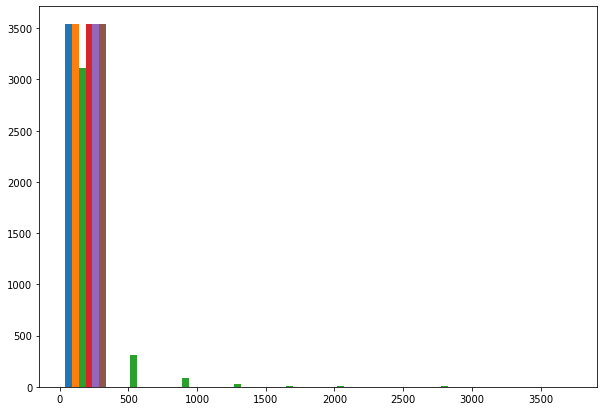

In [3]:
mydata = [dataset['version'], dataset['tags_number'], dataset['score'], dataset['number_of_gif'], 
          dataset['maker_comment_ratio'], dataset['thread_length']]
plt.figure(figsize=(10,7))
plt.hist(mydata)
plt.savefig('normality_test_histogram_plot.png')

<Figure size 720x504 with 0 Axes>

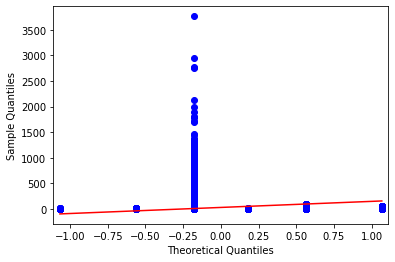

In [4]:
from statsmodels.graphics.gofplots import qqplot

mydata = np.asarray(mydata)
plt.figure(figsize=(10,7))
qqplot(mydata, line='s')
plt.savefig('normality_test_qq_plot.png')

In [5]:
import warnings
from scipy.stats import shapiro
warnings.filterwarnings("ignore")

stat, p_value = shapiro(mydata)
print("Statistics = {:.3f}, p-value = {:.3f}".format(stat, p_value))

alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics = 0.254, p-value = 0.000
Sample does not look Gaussian (reject H0)
